In [1]:
%matplotlib inline

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

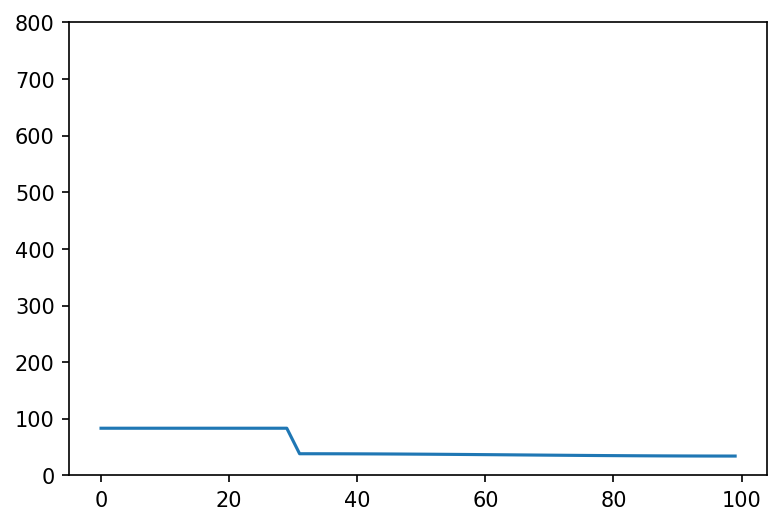

In [2]:
#20201120pmc


from matplotlib import pyplot as pl
from matplotlib import cm

import sys

pl.rcParams['figure.dpi'] = 150
plotymax=800

def copos(xsl=100,pos=[25,74]):    
    
    #run_coefficient=int(200/len(pos)) # factor to multiply `xsl` to give number of steps
    run_coefficient=100
    add_coefficient=0.5 # phosphoprotein added for this proportion of total runs
    dp=0.5   # diffusion proportion, how much stays at same location
    ip=1     # how much enters at each CO each step
    runs=run_coefficient*xsl # how many iterations to do
    xs=[0.0]*xsl
    xs_plot=[]
    #set up left and right boundaries:
    lb=[0];
    for i in pos:
        lb.append(i+1)
    rb=[xsl-1]
    for i in pos:
        rb.append(i-1)

    #iterate the simulation    
    for i in range(runs):
        for j in pos:
            if(i<(runs*add_coefficient)): # only add if below a set proportion of the total run
                xs[j]+=ip
        xs2=[0.0]*xsl #placeholder for the next iteration
        for count,val in enumerate(xs):
            r=val*dp;s=(val-r)/2;
            xs2[count]+=r
            a=100
            if(count in lb): #left boundary treatment
                xs2[count]+=s
                xs2[count+1]+=s
            if(count in rb): #right boundary treatment
                xs2[count]+=s
                xs2[count-1]+=s
            if((not (count in lb)) and (not (count in rb))): #non-boundary treatment, including @CO itself
                xs2[count-1]+=s
                xs2[count+1]+=s
        xs=xs2.copy()
        if(0==(i%xsl)):
            xs_plot.append(xs)
    return xs_plot

def copos_plot_all(xsl=100,pos=[24,75],starttimes=[0,0],endtimes=[0.5,0.5]):
    xs_plot=copos(xsl,pos)
    #xs_plot=copos_timing(xsl,pos,starttimes,endtimes)
    numlines=len(xs_plot)
    cm_subsection=[]
    for i in range(numlines):
        cm_subsection.append(i/(numlines-1))
    colors = [ cm.coolwarm(x) for x in cm_subsection ]

    myplot=pl.plot()
    for count,i in enumerate(xs_plot):
        myplot.append(pl.plot(range(len(i)),i,color=colors[count]))
    return(myplot)

def copos_plot_anim(xsl=100,pos=[24,75]):
    xs_plot=copos(xsl,pos)
    numlines=len(xs_plot)
    for count,i in enumerate(xs_plot):
        pl.cla()
        pl.ylim(ymax=plotymax)
        fn='img'+str(count).zfill(4)+'.png'
        pl.plot(range(len(i)),i)
        pl.savefig(fn)
    return(pl.plot)


def copos_plot_all_gaps(xsl=100,pos=[24,75]):
    xs_plot=copos(xsl,pos)
    numlines=len(xs_plot)
    cm_subsection=[]
    for i in range(numlines):
        cm_subsection.append(i/(numlines-1))
    colors = [ cm.coolwarm(x) for x in cm_subsection ]

    myplot=pl.plot()
    pos.append(xsl+1)
    for count,i in enumerate(xs_plot):
        xaxis=[];yaxis=[]
        j=0
        for i in pos:
            xaxis.append([x for x in range(j,i-1)])
            yaxis.append([xs_plot[x] for x in range(j,i-1)])
            j=i
        for i in range(len(xaxis)):
            print(i)
            myplot.append(pl.plot(xaxis[i],yaxis[i],color=colors[count]))
    return(myplot)

def copos_plot_anim_gaps(xsl=100,pos=[24,75]):
    xs_plot=copos(xsl,pos)
    numlines=len(xs_plot)
    for count,i in enumerate(xs_plot):
        xaxis=list(range(xsl))
        gapoffset=0
        for gap in pos:
            xaxis.pop(gap-gapoffset)
            i.pop(gap-gapoffset)
            gapoffset+=1
        pl.cla()
        pl.plot(figsize=(8,4))
        fn='img'+str(count).zfill(4)+'.png'
        pl.plot(xaxis,i)
        pl.ylim(ymax=plotymax,ymin=0)
        pl.savefig(fn)
    return(pl.plot)


#xsl=int(sys.argv[1])
#pos=[int(x) for x in sys.argv[2:]] #for N crossovers

xsl=100
pos=[30]

copos_plot_anim_gaps(xsl=xsl,pos=pos)
#copos_plot_all(xsl=xsl,pos=pos)
#pl.savefig("copos.pdf",dpi=150)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

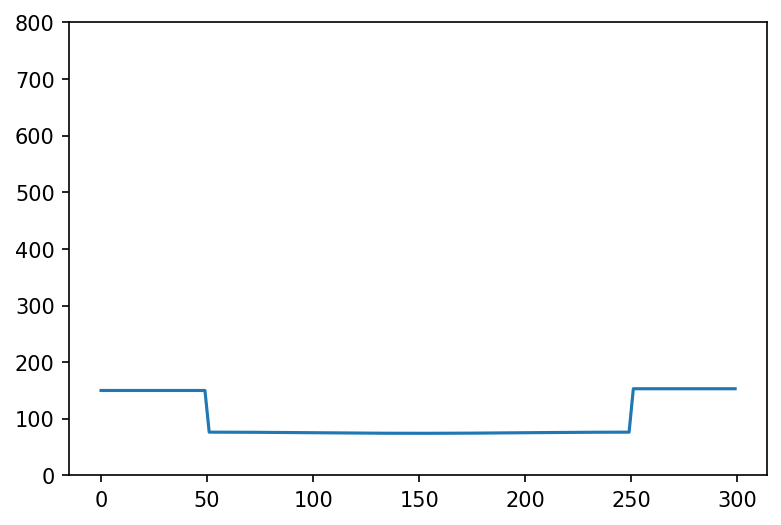

In [5]:
copos_plot_anim_gaps(300,[50,250])

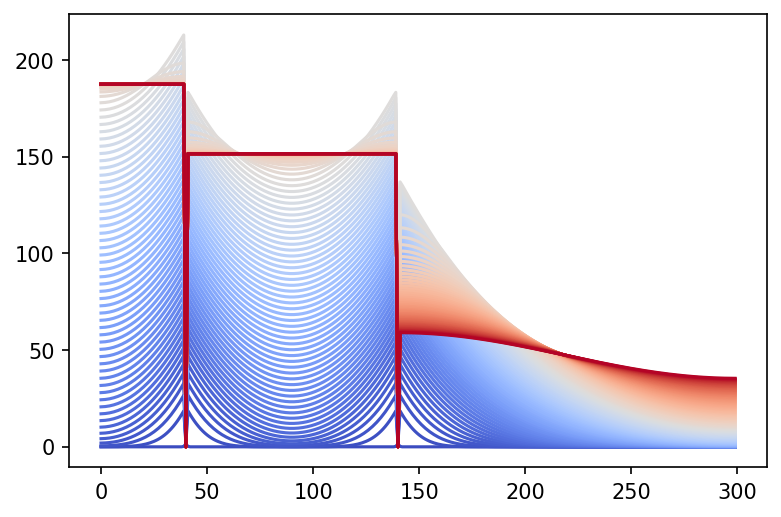

In [9]:
p=copos_plot_all(300,[40,140])